In [11]:
import nltk
from nltk.corpus import twitter_samples
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import re
import string

In [9]:
nltk.download('twitter_samples')
nltk.download('stopwords')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     /home/vc/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package stopwords to /home/vc/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')
tweets = all_positive_tweets+all_negative_tweets
labels = np.append(np.ones((len(all_positive_tweets),1)),np.zeros((len(all_negative_tweets),1)),axis=0)

train_pos = all_positive_tweets[:4000]
train_neg = all_negative_tweets[:4000]
train_x = train_pos+train_neg

In [12]:
data = pd.read_csv("logistic_features.csv")
data.head(10)

,bias,positive,negative,sentiment
0,1.0,3020.0,61.0,1.0
1,1.0,3573.0,444.0,1.0
2,1.0,3005.0,115.0,1.0
3,1.0,2862.0,4.0,1.0
4,1.0,3119.0,225.0,1.0
5,1.0,2955.0,119.0,1.0
6,1.0,3934.0,538.0,1.0
7,1.0,3162.0,276.0,1.0
8,1.0,628.0,189.0,1.0
9,1.0,264.0,112.0,1.0


In [14]:
X = data[['bias','positive','negative']].values
X

array([[1.000e+00, 3.020e+03, 6.100e+01],
       [1.000e+00, 3.573e+03, 4.440e+02],
       [1.000e+00, 3.005e+03, 1.150e+02],
       ...,
       [1.000e+00, 1.440e+02, 7.830e+02],
       [1.000e+00, 2.050e+02, 3.890e+03],
       [1.000e+00, 1.890e+02, 3.974e+03]])

In [16]:
Y = data['sentiment'].values
Y

array([1., 1., 1., ..., 0., 0., 0.])

In [19]:
type(X)

numpy.ndarray

In [21]:
Y.shape

(8000,)

In [22]:
#Final calculated values of the parameters (in real we would be running LR to get the values)
theta = [7e-08, 0.0005239, -0.00055517]

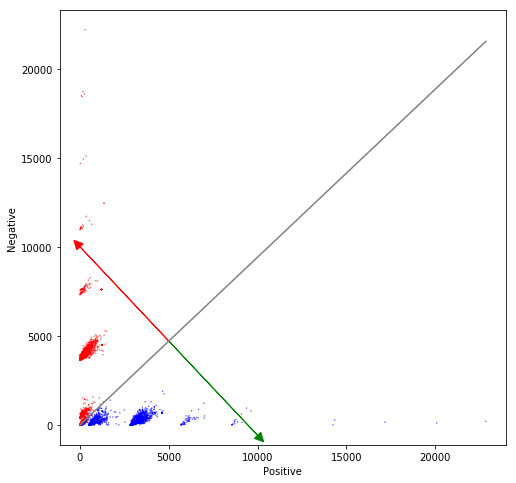

In [25]:
#Plotting on columns 1 and 2 of the data
fig,ax = plt.subplots(figsize=(8,8))
colors = ['Red','Blue']
ax.scatter(X[:,1],X[:,2],c=[colors[int(k)] for k in Y],s=0.1)
plt.xlabel("Positive")
plt.ylabel("Negative")

maxpos = np.max(X[:,1])
offset = 5000

# Plot a gray line that divides the 2 areas.
ax.plot([0,  maxpos], [neg(theta, 0),   neg(theta, maxpos)], color = 'gray') 

# Plot a green line pointing to the positive direction
ax.arrow(offset, neg(theta, offset), offset, direction(theta, offset), head_width=500, head_length=500, fc='g', ec='g')
# Plot a red line pointing to the negative direction
ax.arrow(offset, neg(theta, offset), -offset, -direction(theta, offset), head_width=500, head_length=500, fc='r', ec='r')

plt.show()

In [24]:
#Plot the models line which separates the examples
def neg(theta,pos):
    return (-theta[0] - pos*theta[1])/theta[2]

def direction(theta,pos):
    return pos*theta[2]/theta[1]